In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import cv2
import sys
import os
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


In [ ]:
sys.path.append('/content/gdrive/My Drive/Learning/image classification/')
print("All the system paths:")
sys.path

All the system paths:


['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/gdrive/My Drive/Learning/image classification/',
 '/content/gdrive/My Drive/Learning/image classification/']

In [ ]:
os.chdir('/content/gdrive/My Drive/Learning/image classification/')
print("Current working directory:")
os.getcwd()

Current working directory:


'/content/gdrive/My Drive/Learning/image classification'

In [ ]:
def cv2plt(img):
    plt.figure(figsize=(7,7))        # To change the size of figure
    plt.axis('off')
    if np.size(img.shape) == 3:
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img,cmap='gray',vmin=0,vmax=255)  
    plt.show()

print(cv2plt)

<function cv2plt at 0x7fd0f5a2c8c8>


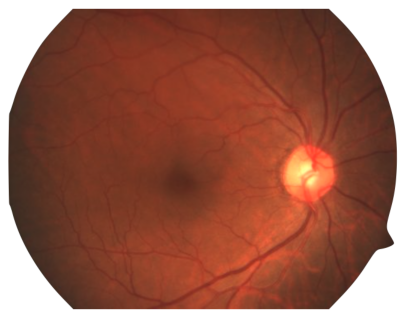

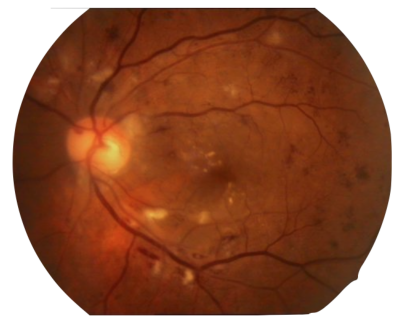

In [ ]:
image_normal = cv2.imread('normal.png')
cv2plt(image_normal)
image_diabetic = cv2.imread('diabetic retinopathy.png')
cv2plt(image_diabetic)

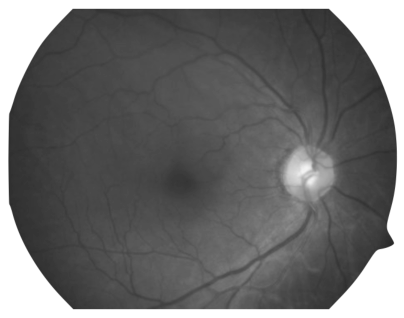

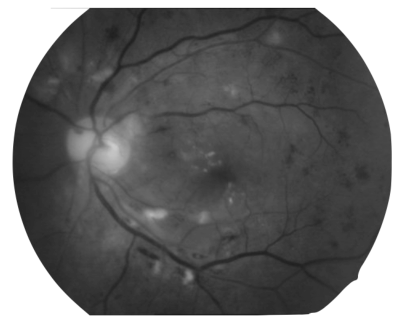

In [ ]:
normal_gray = cv2.cvtColor(image_normal, cv2.COLOR_BGR2GRAY)
cv2plt(normal_gray)
retino_gray = cv2.cvtColor(image_diabetic, cv2.COLOR_BGR2GRAY)
cv2plt(retino_gray)

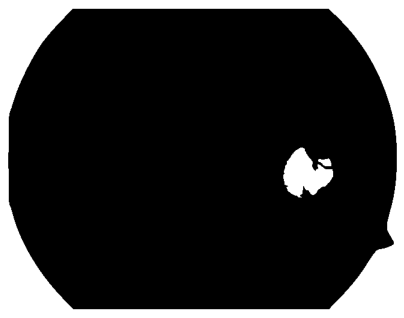

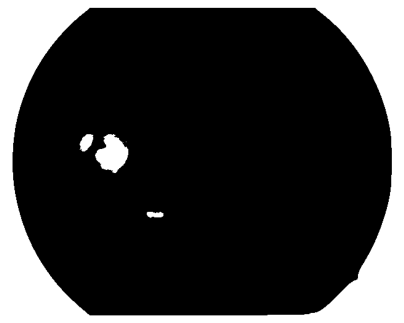

In [ ]:
(_,nmsk) = cv2.threshold(normal_gray, 150,255, cv2.THRESH_BINARY)
cv2plt(nmsk)
(_,rmsk) = cv2.threshold(retino_gray, 150,255, cv2.THRESH_BINARY)
cv2plt(rmsk)

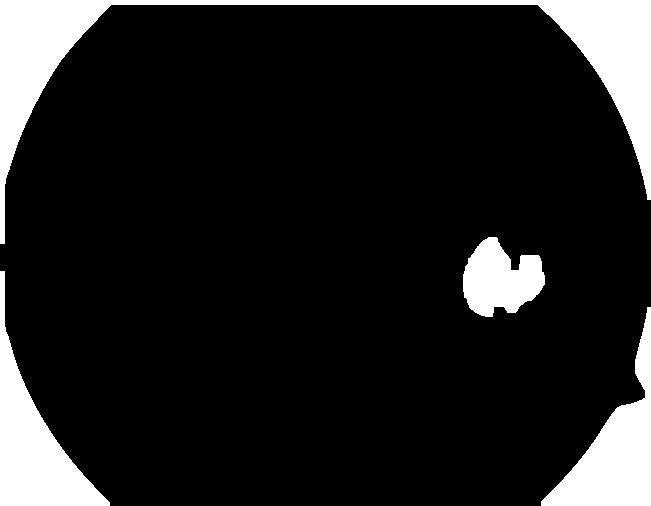

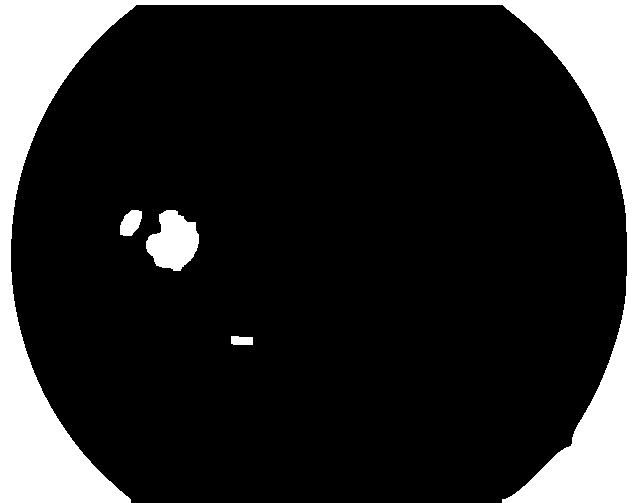

In [ ]:
 kernel = np.ones((8,8),np.uint8)
 final_n = cv2.morphologyEx(np.uint8(nmsk),cv2.MORPH_CLOSE,kernel)
 final_n = cv2.morphologyEx(np.uint8(final_n),cv2.MORPH_OPEN,kernel)
 cv2_imshow(final_n)
 final_r = cv2.morphologyEx(np.uint8(rmsk),cv2.MORPH_CLOSE,kernel)
 final_r = cv2.morphologyEx(np.uint8(final_r),cv2.MORPH_OPEN,kernel)
 cv2_imshow(final_r)


In [ ]:
# ret, labels = cv2.connectedComponents(final_n)

# print('objects number is:', ret-2)
# plt.show()

objects number is: 32


In [ ]:
# ret, labels = cv2.connectedComponents(final_r)

# print('objects number is:', ret-2)
# plt.show()

In [ ]:
contours, hierarchy = cv2.findContours(final_n,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
count = []
for x in contours:
  area = cv2.contourArea(x)
  if area < 1000 :
    count.append(x)
len(count) 
  

0

In [ ]:
contours, hierarchy = cv2.findContours(final_r,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
count = []
for x in contours:
  area = cv2.contourArea(x)
  if area < 1000 :
    count.append(x)
len(count) 

2